In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset
data = pd.read_csv("salary.csv")

In [3]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


* Domain Analysis
* Traget = Salary Preduction for the employees of the state of the Texas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [5]:
data.drop(["LAST NAME","FIRST NAME","MI","duplicated","multiple_full_time_jobs","combined_multiple_jobs","hide_from_search","summed_annual_salary"],axis=1,inplace=True)


* we are delete the ["LAST NAME","FIRST NAME","MI","duplicated","multiple_full_time_jobs","combined_multiple_jobs","hide_from_search"]
Bcoz all the columns have more then 90% null values

In [6]:
# show all the columns names
data.head(pd.set_option("display.max_columns",None))

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490


## Basic checks

In [7]:
data.head(10) # it will show the first 10 rows of the dataset

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030
5,302,OFFICE OF THE ATTORNEY GENERAL ...,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.00000,40.0,12899.00,154788.00,1177785
6,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,1984,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/22/20,0.00000,40.0,5835.50,70026.00,1085586
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.00000,40.0,10000.00,120000.00,147334
8,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,03/04/20,49.40717,20.0,4281.95,51383.40,147334
9,537,DEPARTMENT OF STATE HEALTH SERVICES ...,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/19,0.00000,40.0,3447.25,41367.00,129635


In [8]:
data.tail(10) # it will show the last 10 rows of the dataset

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
149471,809,STATE PRESERVATION BOARD ...,7468,CURATOR II ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/27/97,0.00,40.0,4171.28,50055.36,2146
149472,809,STATE PRESERVATION BOARD ...,0134,CUSTOMER SERVICE REP III ...,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/17/16,0.00,40.0,2720.00,32640.00,1000760
149473,809,STATE PRESERVATION BOARD ...,1810,CREATIVE MEDIA DESIGNER I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,11/01/08,0.00,40.0,3658.42,43901.04,177621
149474,809,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,01/02/20,11.50,20.0,996.66,11959.92,89332
149475,809,STATE PRESERVATION BOARD ...,E096,EXECUTIVE DIRECTOR ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,11/01/16,0.00,40.0,14665.83,175989.96,191714
149476,809,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490
149480,809,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583


In [9]:
data.shape # it show the shape fo the data

(149481, 13)

In [10]:
data.dtypes # it shows all columns data type

AGENCY            int64
AGENCY NAME      object
CLASS CODE       object
CLASS TITLE      object
ETHNICITY        object
GENDER           object
STATUS           object
EMPLOY DATE      object
HRLY RATE       float64
HRS PER WK      float64
MONTHLY         float64
ANNUAL          float64
STATE NUMBER      int64
dtype: object

In [11]:
data.isnull().sum()

AGENCY          0
AGENCY NAME     0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

In [12]:
data.info() # it gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   CLASS CODE    149481 non-null  object 
 3   CLASS TITLE   149481 non-null  object 
 4   ETHNICITY     149481 non-null  object 
 5   GENDER        149481 non-null  object 
 6   STATUS        149481 non-null  object 
 7   EMPLOY DATE   149481 non-null  object 
 8   HRLY RATE     149481 non-null  float64
 9   HRS PER WK    149481 non-null  float64
 10  MONTHLY       149481 non-null  float64
 11  ANNUAL        149481 non-null  float64
 12  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 14.8+ MB


* 8 columns have the Numerical type of data
* 13 columns have the categorical type of data

In [13]:
data.describe() # is shows on the data all importtant values

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


* from the dataset all the cloumns are not normal distribution
* from the column of HRLY RATE have a more outliers
* from the column of MONTHLY have a more outliers
* from the column of ANNUAL have a more outliers

In [14]:
num_col=data.select_dtypes(include=["int","float64"])# it will shows the only  numberical columns on the data set.

In [15]:
num_col

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,75.96150,29.0,9545.82,114549.84,127717
1,212,81.04454,4.0,1404.77,16857.24,127717
2,241,75.96150,29.0,9545.82,114549.84,59115
3,212,81.04453,4.0,1404.77,16857.24,59115
4,696,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...
149476,809,0.00000,40.0,2899.00,34788.00,770781
149477,809,0.00000,40.0,5500.00,66000.00,847431
149478,809,12.93000,20.0,1120.60,13447.20,34266
149479,809,0.00000,40.0,5744.16,68929.92,123490


In [16]:
cat_col=data.select_dtypes(include="O")# it will shows only categorical columns on the data set.

In [17]:
cat_col

,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20
...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17
149477,STATE PRESERVATION BOARD ...,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15
149478,STATE PRESERVATION BOARD ...,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12
149479,STATE PRESERVATION BOARD ...,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89


In [18]:
for i in cat_col:
    print(i,data[i].unique()) # it shows on the unique values on the data set from categorical columns
    print("----------------------------------------------")
    print(i,data[i].value_counts()) # it shows on the value_counts on the data set from categorical columns
    print("=======================================")

AGENCY NAME ['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISLAT

* in categorical column we find out the unique and value_counts.

# EXPLORATORY DATA ANALYSIS.

## Univarate analysis;

In [19]:
import sweetviz as sv

In [20]:
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                            | [  0%]   00:00 -> …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
# In sweetviz we found the univarate analysis of the data.

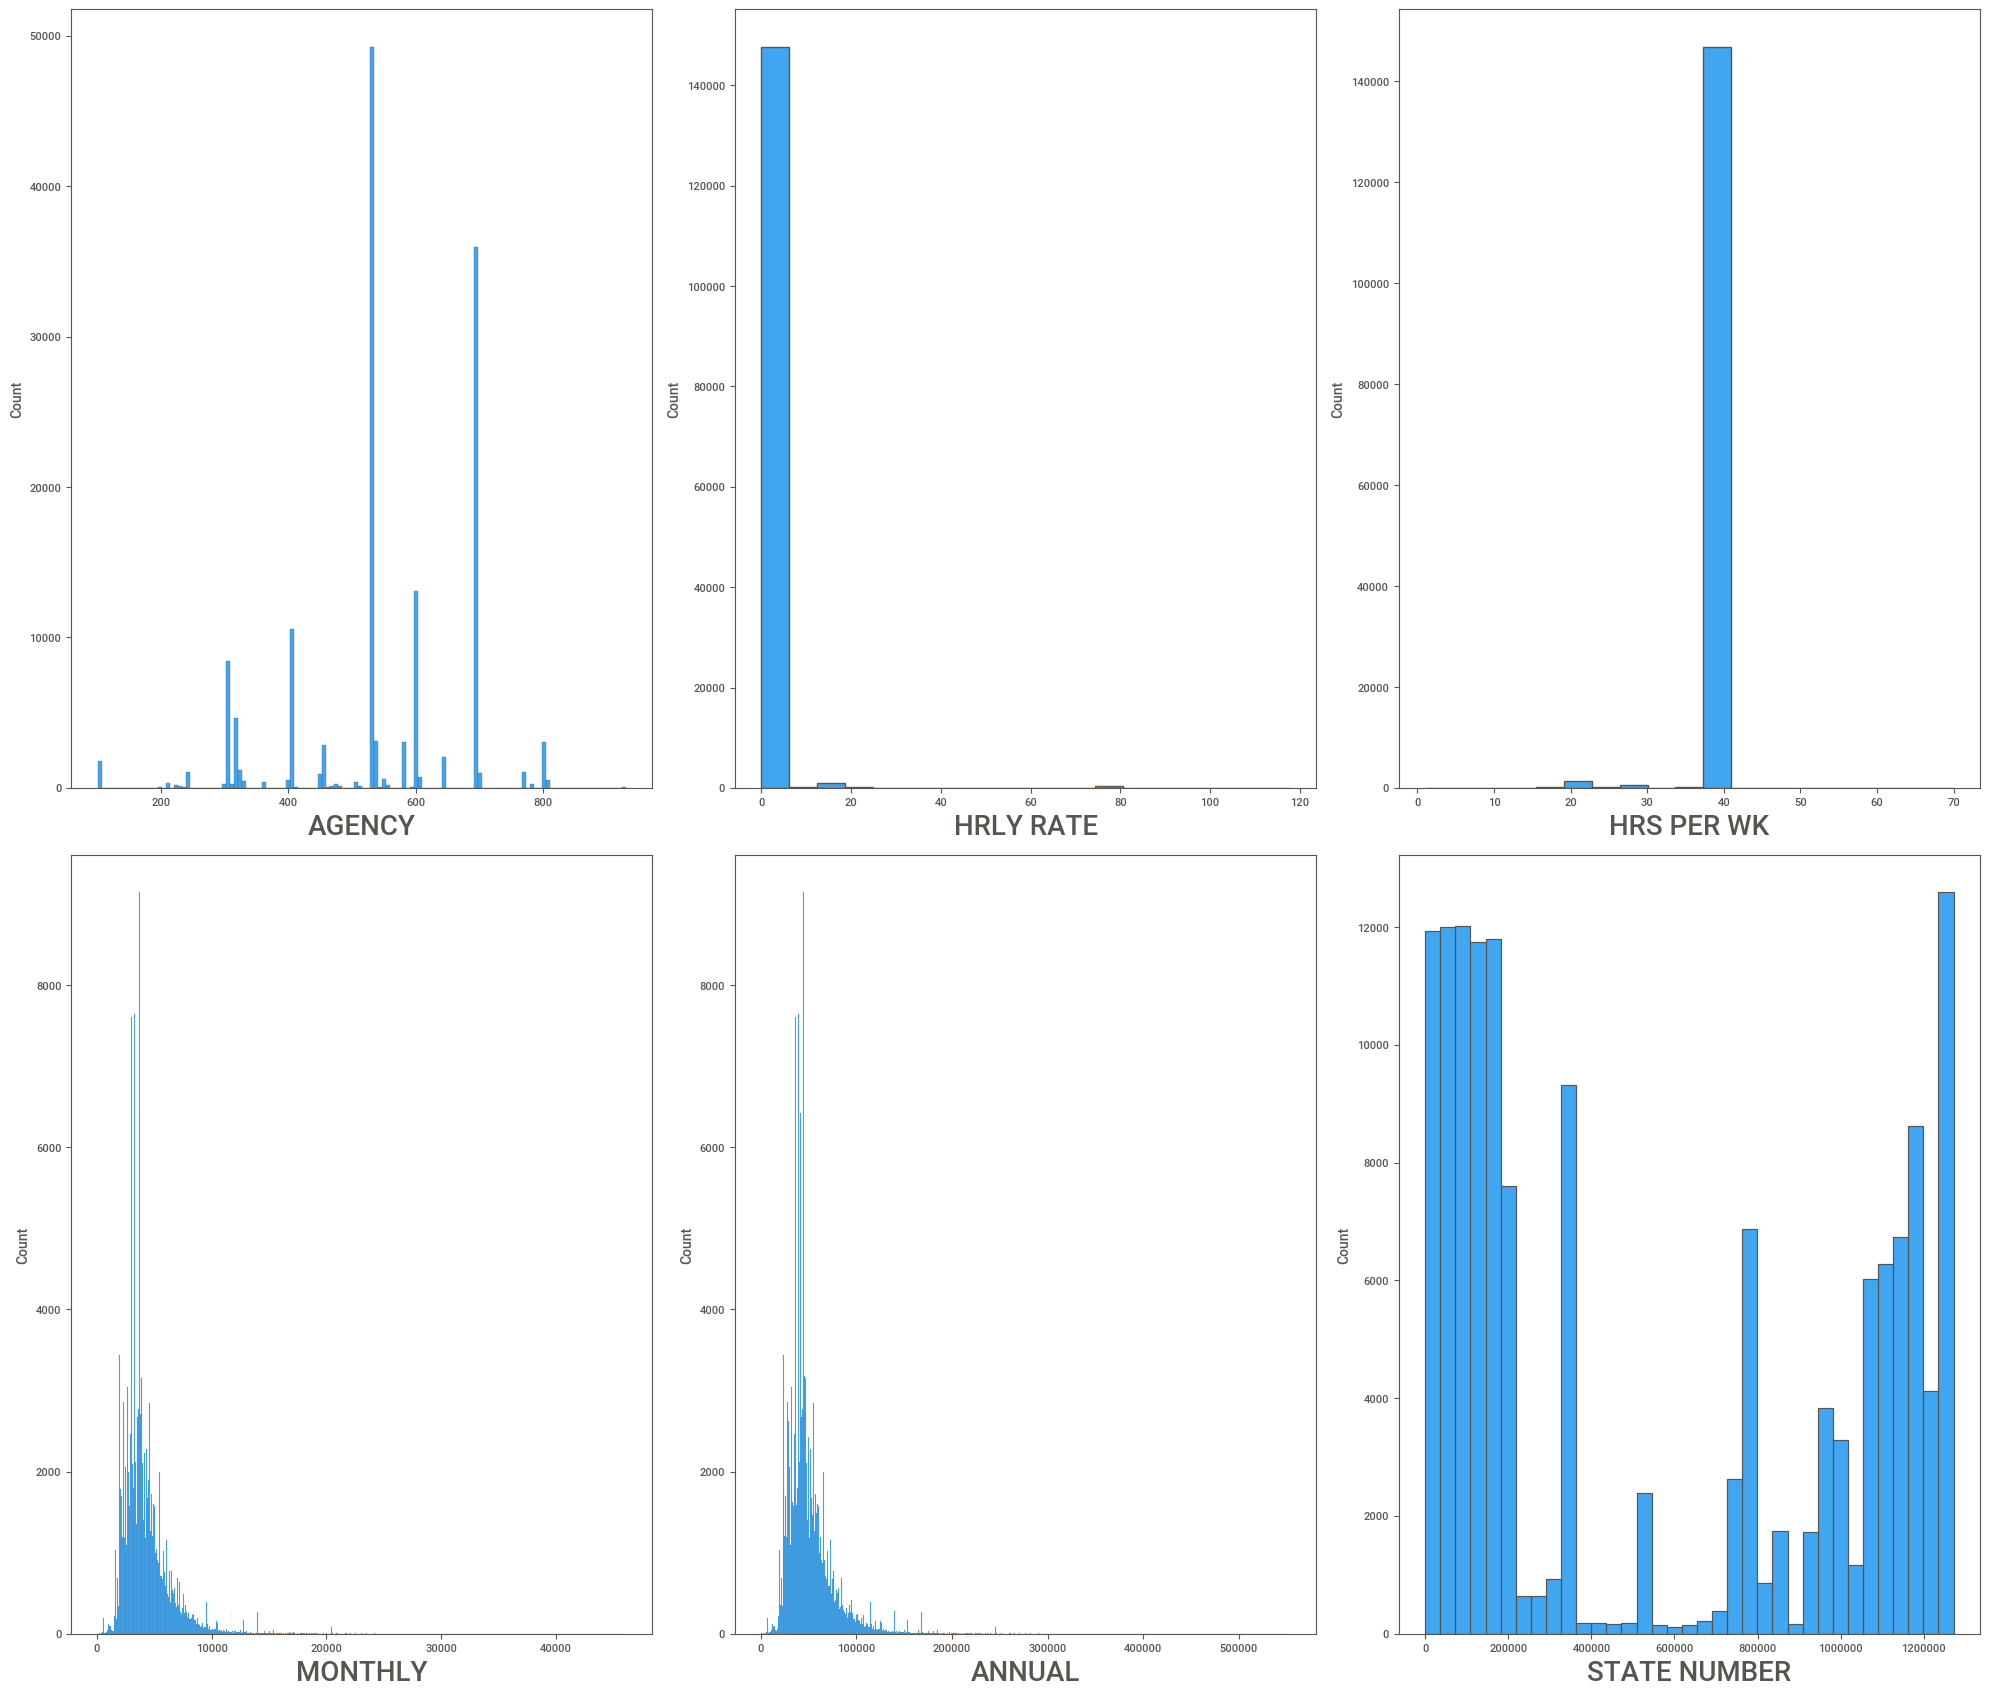

In [22]:
plt.figure(figsize=(20,25),facecolor="white")
plot_num=1
for i in num_col:
    if plot_num<=7:
        plt.subplot(3,3,plot_num)
        sns.histplot(x=data[i])
        plt.xlabel(i,fontsize=20)
    plot_num=plot_num + 1
plt.tight_layout()        

* In this AGENCY column all the values are unique and the Range BW 500 to 600 more datas are present
* In HRLY RATE more values are present on 0
* HRS WK most people working 40hrs per week
* MONTHLY and ANNUAL are mostly correlation together
* STATE NUMBER have high counts on 0 to 20000, 1100000 to 1200000

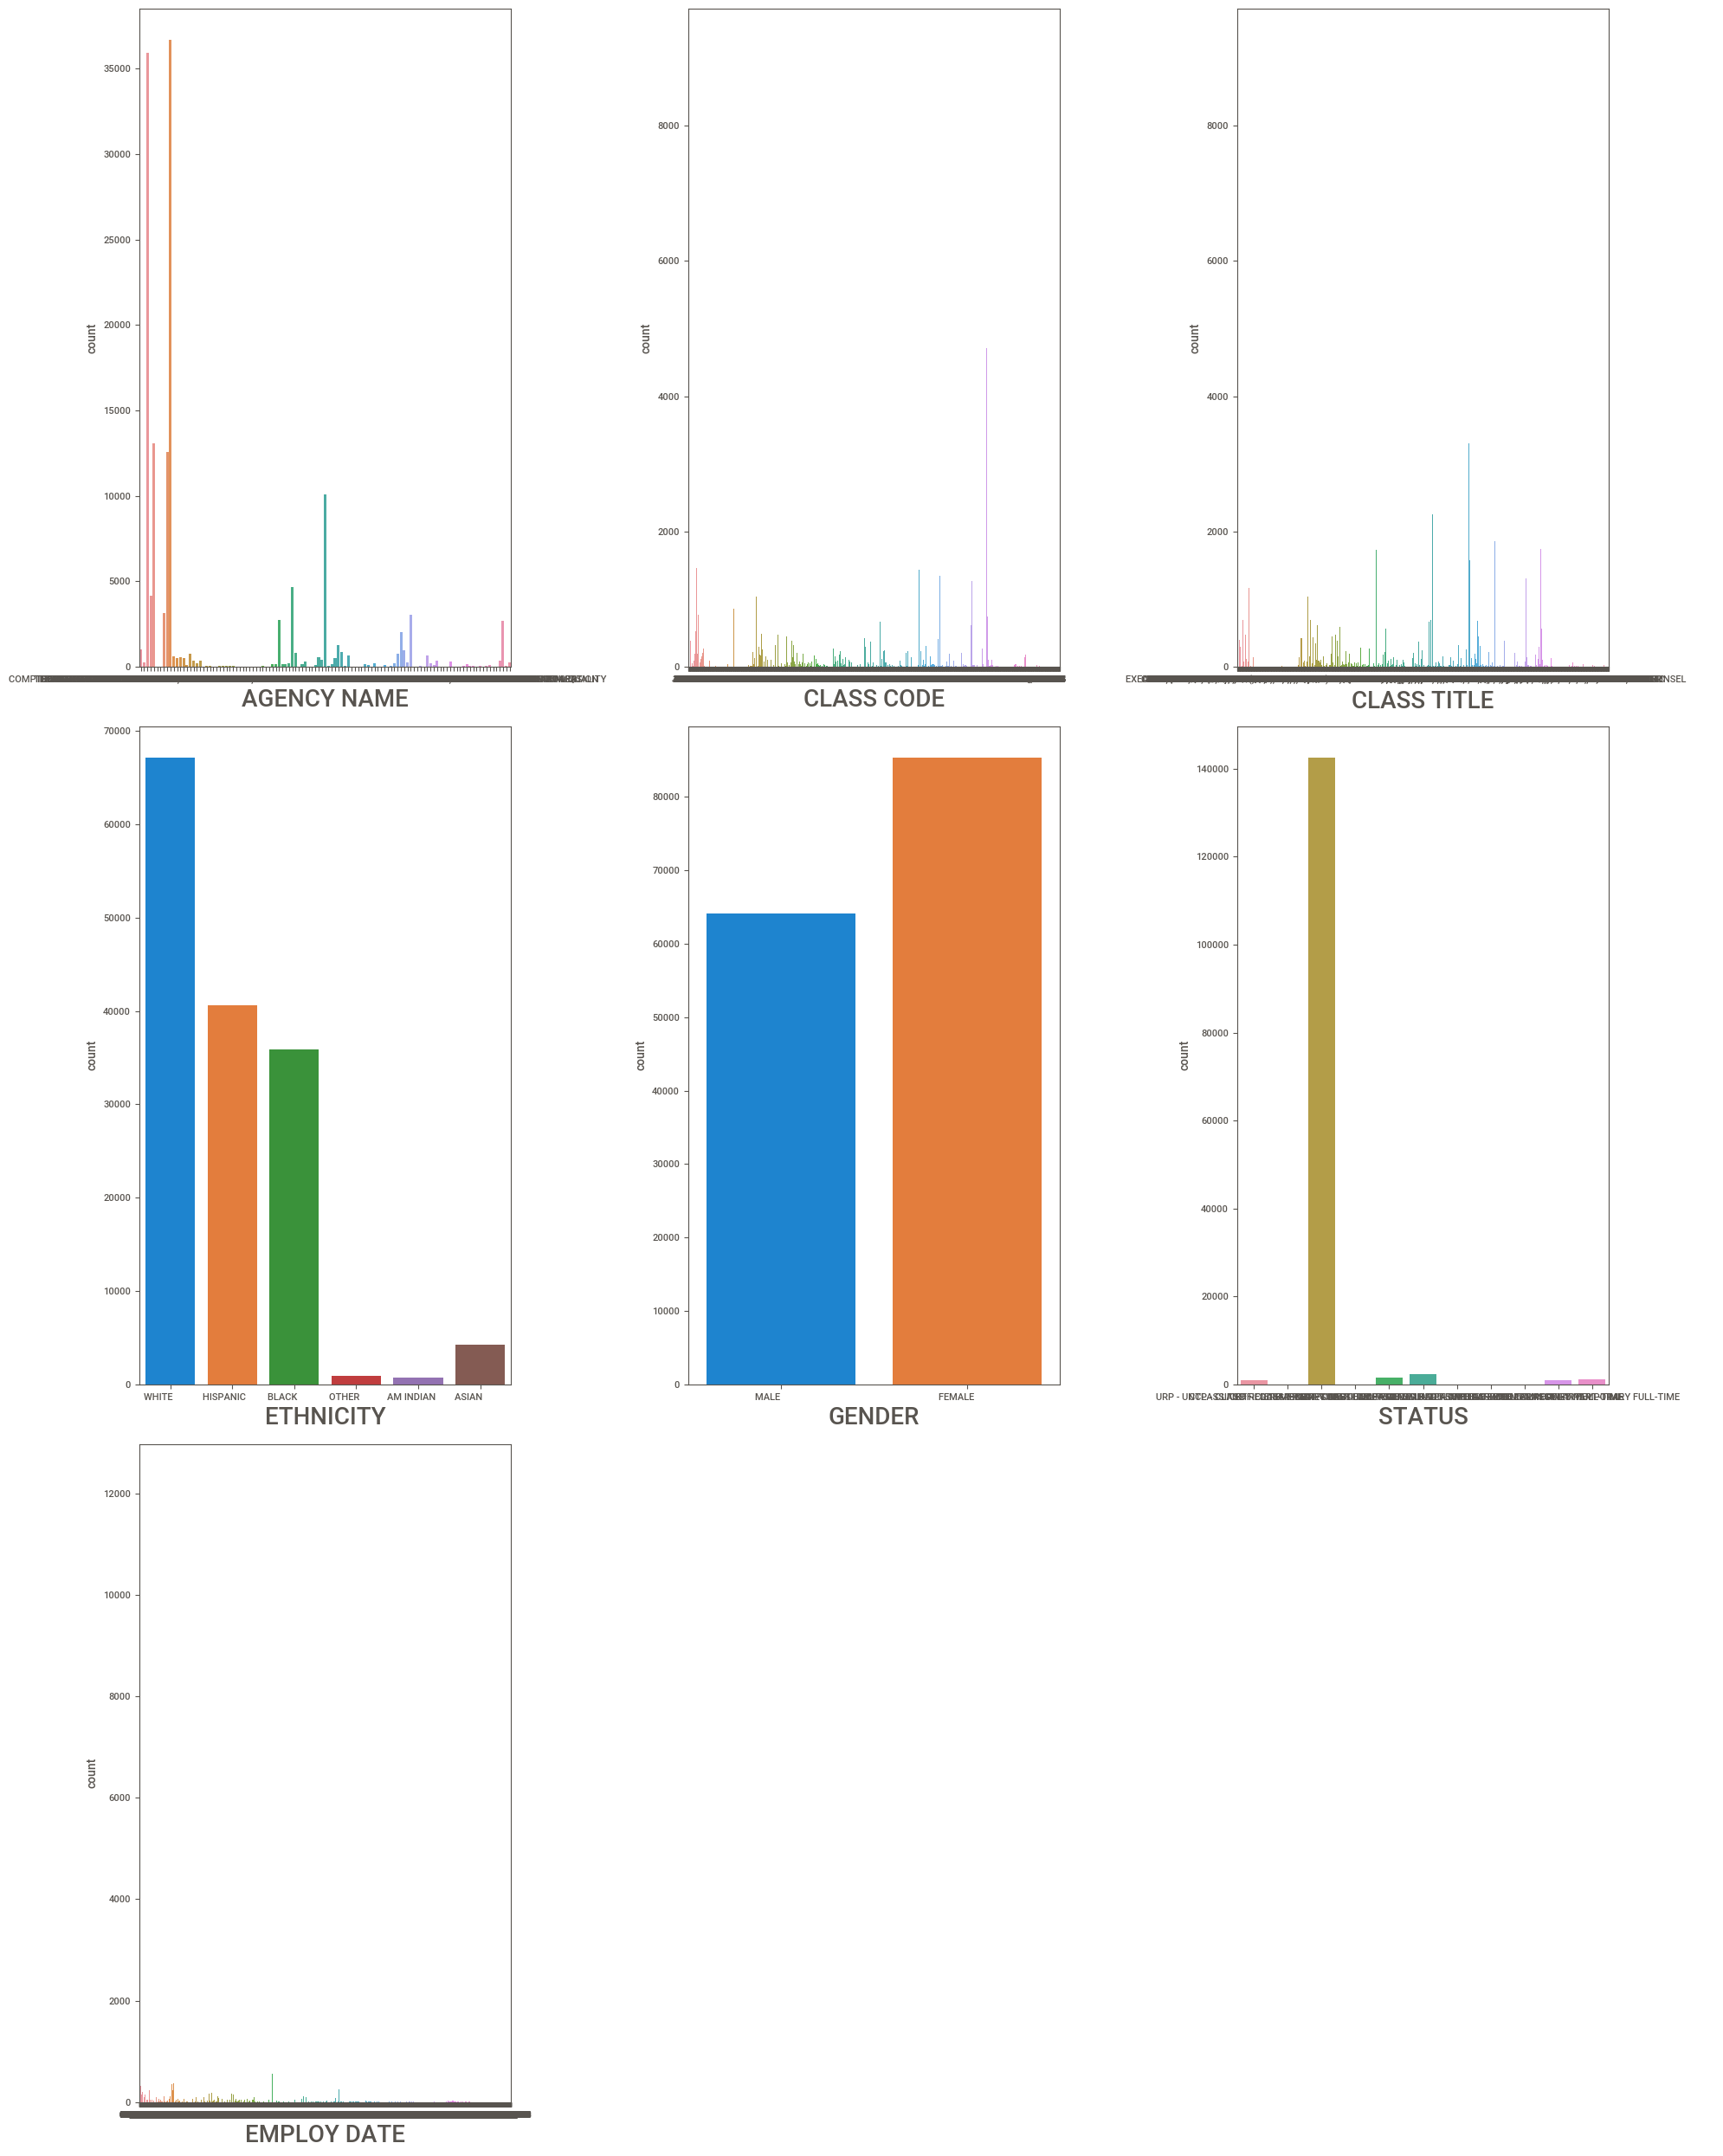

In [23]:
plt.figure(figsize=(20,25),facecolor="white")
plot_num=1
for i in cat_col:
    if plot_num<=13:
        plt.subplot(3,3,plot_num)
        sns.countplot(x=data[i])
        plt.xlabel(i,fontsize=20)
    plot_num=plot_num + 1
plt.tight_layout()     

In [24]:
cat_col.drop("EMPLOY DATE",axis=1,inplace=True)

# Bivariate

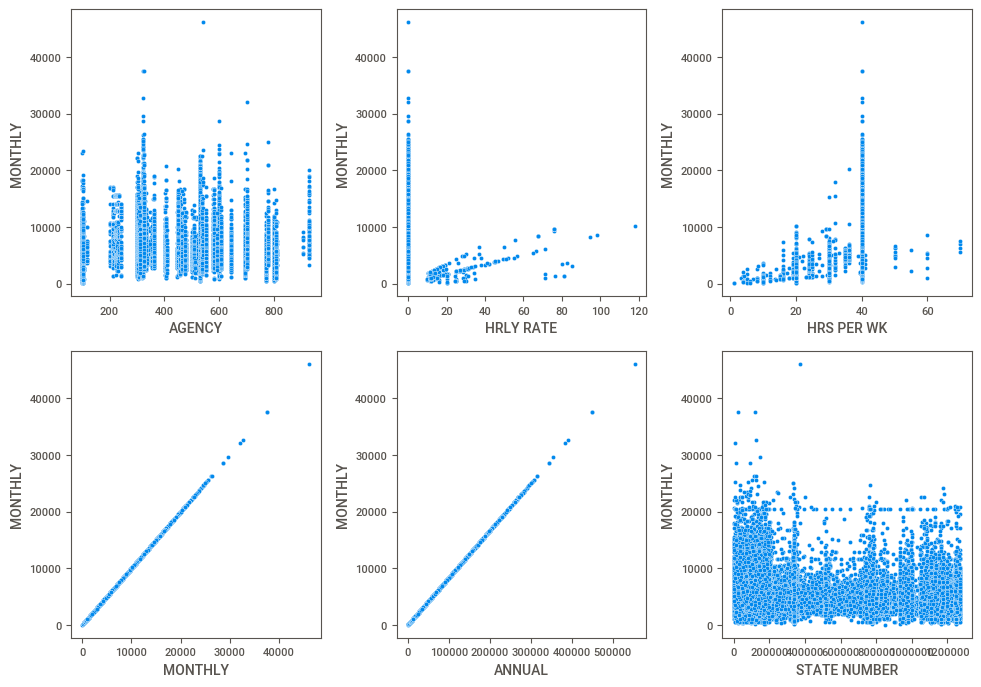

In [25]:
plt.figure(figsize=(10,10))
n = 1
#scatterplot
for i in num_col:
    plt.subplot(3,3,n)
    sns.scatterplot(x=data[i],y=data["MONTHLY"])
    n+=1
plt.tight_layout()
plt.show()

* form the AGENCY to MONTHLY all the data points are have a linearity
* HRLY RATE and HRLY PER WK that data have a simularity two each others and thius data have linearity to MONTHLY columns
* ANNUAL and MONTHLY have a passtive linearity but it have some outliers
* in STATE NUMBER All the datapoint are non linearity

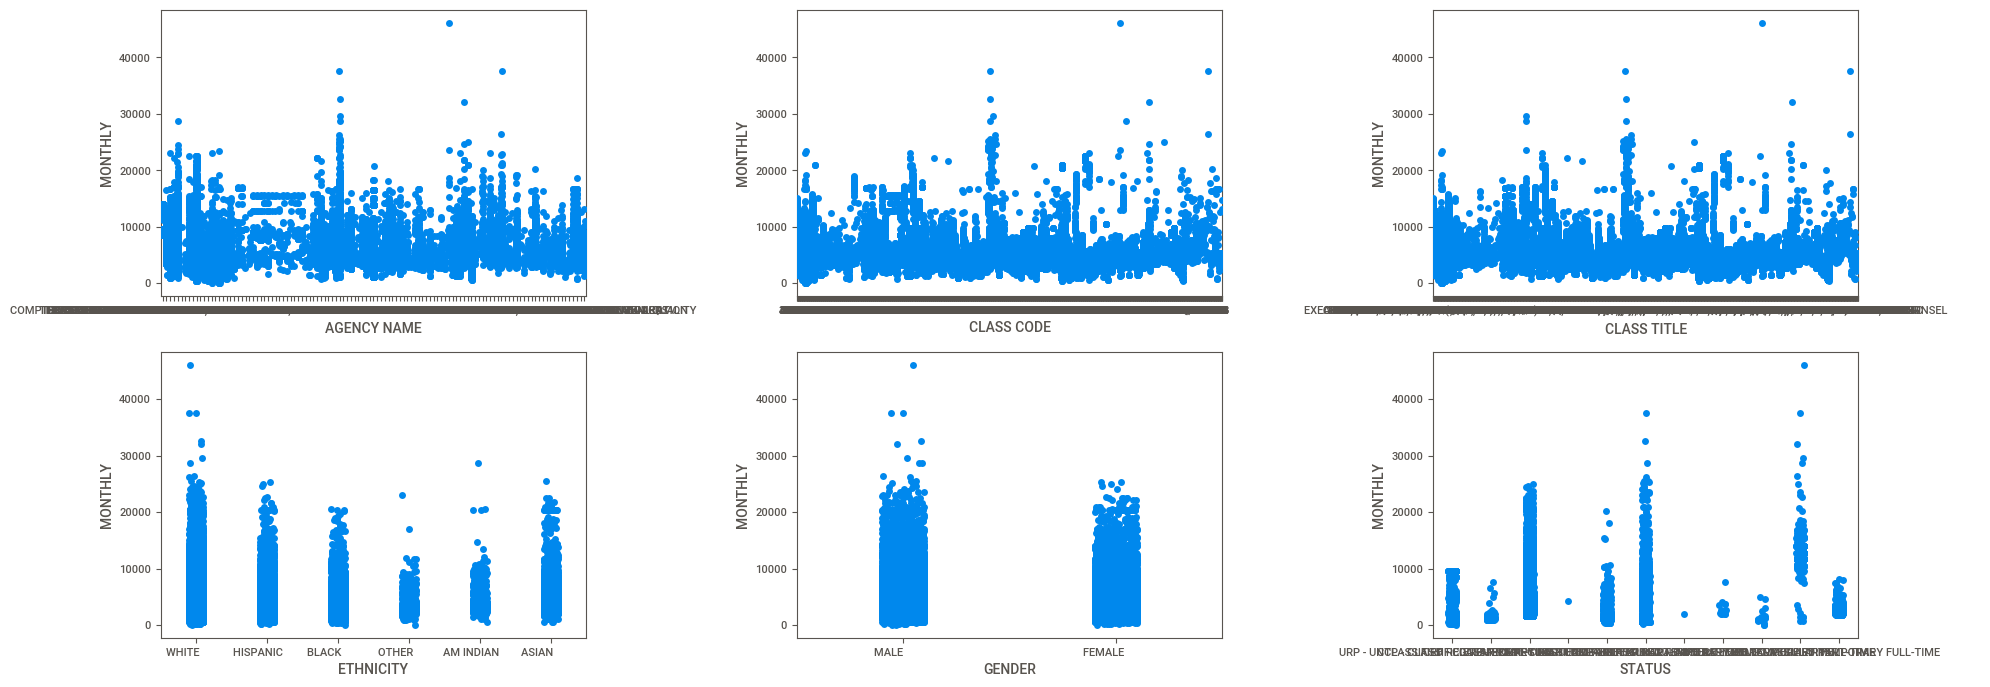

In [26]:
#stripplot
plt.figure(figsize=(20,10))
m=1
for i in cat_col:
    plt.subplot(3,3,m)
    sns.stripplot(x=data[i],y=data["MONTHLY"])
    m+=1
plt.tight_layout()
plt.show()    

* AGENCY NAME, CLASS CODE, CLASS TITLE those columns have a outliers and the data points are placed nearly to each others
* MALE, FEMALE have some level of linearity MALE have some outliers
* ETHINICITY in WHITE have a high salary and it also have some outliers
* STATUS it have some outlies and datas are non linearity

# LabelEncoding

In [27]:
# Convert categorical to numerical data by using LabelEncoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col.columns:
    data[i]=le.fit_transform(data[i])
data.head()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,17,1409,711,5,1,8,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,48,616,560,5,1,4,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,17,1409,711,5,1,8,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,48,616,560,5,1,4,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,88,810,292,3,0,0,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [29]:
data.shape

(149481, 13)

# Handling the Outliers

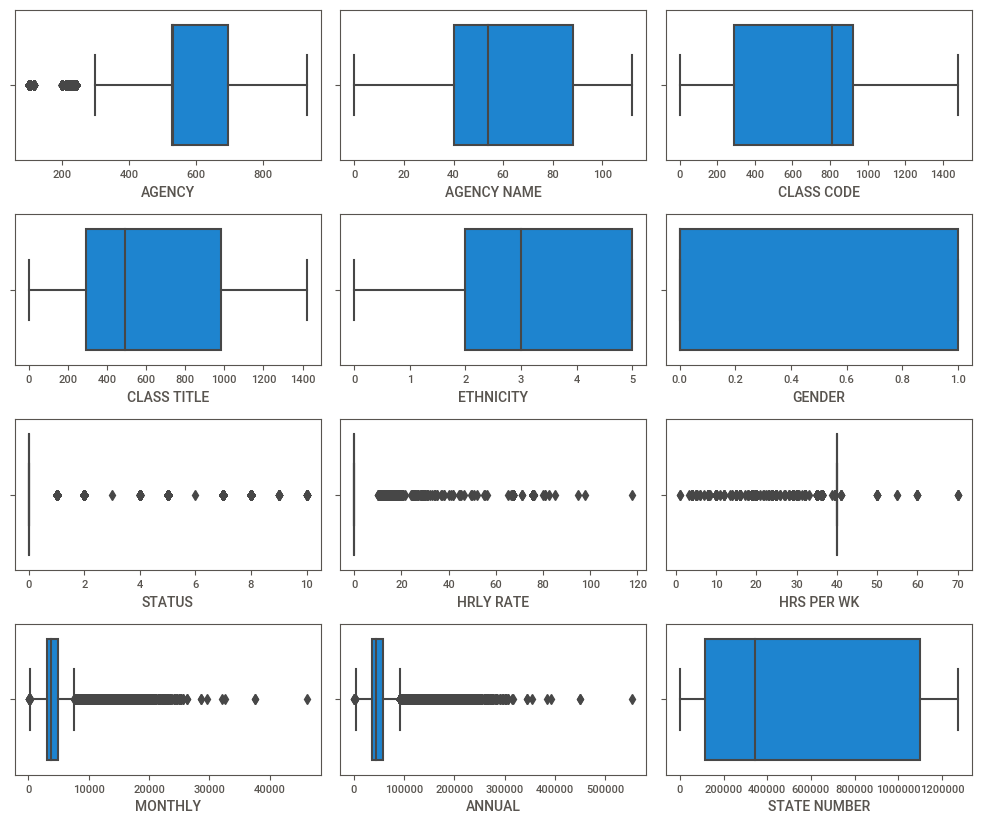

In [30]:
plt.figure(figsize=(10,10))
num=1
for i in data.drop("EMPLOY DATE",axis=1):
    plt.subplot(5,3,num)
    sns.boxplot(x=data[i])
    num+=1
plt.tight_layout()    

In [31]:
q1=data.drop("EMPLOY DATE",axis=1).quantile(0.25)

In [32]:
q3=data.drop("EMPLOY DATE",axis=1).quantile(0.75)

In [33]:
data.drop("EMPLOY DATE",axis=1,inplace=True)

In [34]:
IQR = q1-q3

In [35]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

In [36]:
upper_limit

AGENCY             445.500
AGENCY NAME         16.000
CLASS CODE         -30.000
CLASS TITLE        -53.500
ETHNICITY            0.500
GENDER              -0.500
STATUS               0.000
HRLY RATE            0.000
HRS PER WK          40.000
MONTHLY           2096.855
ANNUAL           25162.260
STATE NUMBER   -380249.000
dtype: float64

In [37]:
# lower limit %
lower_limit/len(data)*100

AGENCY             0.521471
AGENCY NAME        0.074926
CLASS CODE         0.828199
CLASS TITLE        0.888742
ETHNICITY          0.004348
GENDER             0.001003
STATUS             0.000000
HRLY RATE          0.000000
HRS PER WK         0.026759
MONTHLY            3.872596
ANNUAL            46.471150
STATE NUMBER    1066.411785
dtype: float64

In [38]:
# % of outliers lower than lower limit
a = (data<lower_limit).sum()/len(data)*100

In [39]:
b = (data>upper_limit).sum()/len(data)*100

In [40]:
percentage = a+b

In [41]:
f = percentage[percentage<5]

In [42]:
len(percentage)

12

In [43]:
index_percentage = f.index.tolist()

In [44]:
col = data[index_percentage]

In [45]:
for i in col:
    data.loc[data[i]<lower_limit[i],i]=data[i].median()

In [46]:
for i in col:
    data.loc[data[i]>upper_limit[i],i]=data[i].median()

In [48]:
data.loc[data["MONTHLY"]>27000,"MONTHLY"] = data["MONTHLY"].median()

<Axes: xlabel='MONTHLY'>

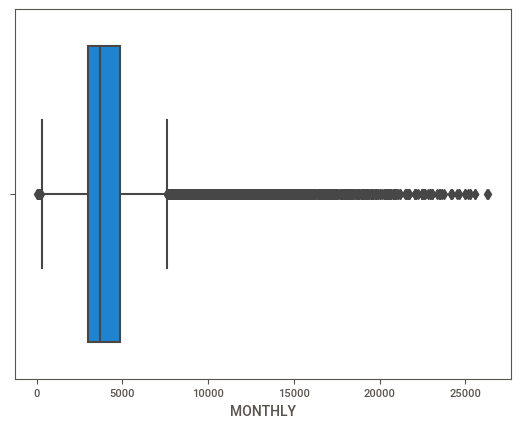

In [49]:
sns.boxplot(x=data["MONTHLY"])

In [50]:
data.loc[data["AGENCY"]<300,"AGENCY"]=data["AGENCY"].median()

<Axes: xlabel='AGENCY'>

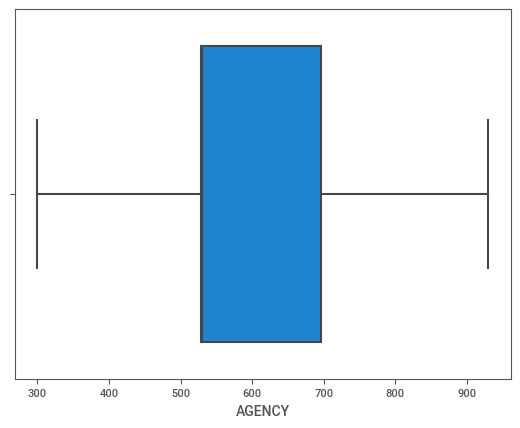

In [51]:
sns.boxplot(x=data["AGENCY"])

## After handle the outlier

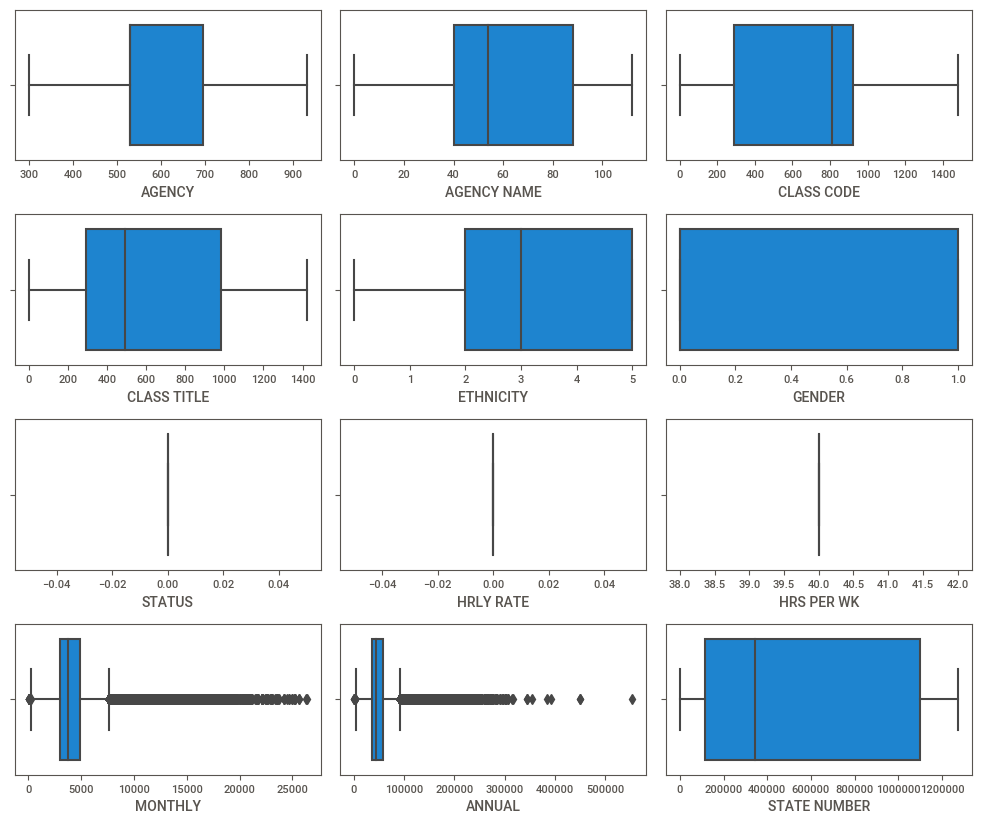

In [96]:
plt.figure(figsize=(10,10))
num=1
for i in data:
    plt.subplot(5,3,num)
    sns.boxplot(x=data[i])
    num+=1
plt.tight_layout()   

In [52]:
data.describe()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.0,149481.0,149481.0,149481.00000,149481.000000,1.494810e+05
mean,554.692302,60.276202,634.574060,624.022090,3.593253,0.429172,0.0,0.0,40.0,4224.55869,50714.210973,5.651930e+05
std,125.006177,28.849532,378.480906,404.245777,1.359346,0.494960,0.0,0.0,0.0,2081.27107,25117.340292,4.786212e+05
min,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,40.0,50.00000,600.000000,1.000000e+00
25%,529.000000,40.000000,287.000000,292.000000,2.000000,0.000000,0.0,0.0,40.0,3019.84000,36238.080000,1.133340e+05
50%,530.000000,54.000000,809.000000,494.000000,3.000000,0.000000,0.0,0.0,40.0,3720.17000,44642.040000,3.463730e+05
75%,696.000000,88.000000,921.000000,983.000000,5.000000,1.000000,0.0,0.0,40.0,4865.51000,58389.720000,1.100500e+06
max,930.000000,112.000000,1480.000000,1421.000000,5.000000,1.000000,0.0,0.0,40.0,26343.08000,553500.000000,1.271604e+06


# Scaling

In [53]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_data = scale.fit_transform(data)

In [54]:
scale_data = pd.DataFrame(scale_data,columns=data.columns)

In [55]:
scale_data

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,-0.197529,-1.500071,2.046150,0.215162,1.034874,1.153287,0.0,0.0,0.0,2.556745,2.541505,-0.914037
1,-0.197529,-0.425527,-0.049075,-0.158375,1.034874,1.153287,0.0,0.0,0.0,-1.354844,-1.347957,-0.914037
2,-0.197529,-1.500071,2.046150,0.215162,1.034874,1.153287,0.0,0.0,0.0,2.556745,2.541505,-1.057370
3,-0.197529,-0.425527,-0.049075,-0.158375,1.034874,1.153287,0.0,0.0,0.0,-1.354844,-1.347957,-1.057370
4,1.130410,0.960982,0.463502,-0.821340,-0.436427,-0.867087,0.0,0.0,0.0,-0.451787,-0.450008,-0.836077
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,2.034368,0.545030,1.076480,1.419878,1.034874,1.153287,0.0,0.0,0.0,-0.636901,-0.634074,0.429544
149477,2.034368,0.545030,-1.454699,1.929471,1.034874,-0.867087,0.0,0.0,0.0,0.612820,0.608577,0.589692
149478,2.034368,0.545030,-1.666071,-0.742180,1.034874,1.153287,0.0,0.0,0.0,-1.491381,-1.483721,-1.109288
149479,2.034368,0.545030,-0.942122,0.947392,1.034874,1.153287,0.0,0.0,0.0,0.730134,0.725227,-0.922869


In [56]:
scale_data.corr()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
AGENCY,1.000000,0.457766,0.149959,-0.209337,-0.000605,0.116151,NaN,NaN,NaN,-0.211150,-0.210703,0.057702
AGENCY NAME,0.457766,1.000000,-0.052702,-0.150526,0.030906,0.190787,NaN,NaN,NaN,-0.086333,-0.085757,0.021148
CLASS CODE,0.149959,-0.052702,1.000000,0.144373,-0.056818,0.127360,NaN,NaN,NaN,-0.076231,-0.074360,0.047658
CLASS TITLE,-0.209337,-0.150526,0.144373,1.000000,0.044255,0.060309,NaN,NaN,NaN,0.086249,0.085747,-0.092181
ETHNICITY,-0.000605,0.030906,-0.056818,0.044255,1.000000,0.106739,NaN,NaN,NaN,0.170561,0.170107,-0.074631
GENDER,0.116151,0.190787,0.127360,0.060309,0.106739,1.000000,NaN,NaN,NaN,0.129100,0.129265,-0.003143
STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRLY RATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRS PER WK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTHLY,-0.211150,-0.086333,-0.076231,0.086249,0.170561,0.129100,NaN,NaN,NaN,1.000000,0.994155,-0.266234


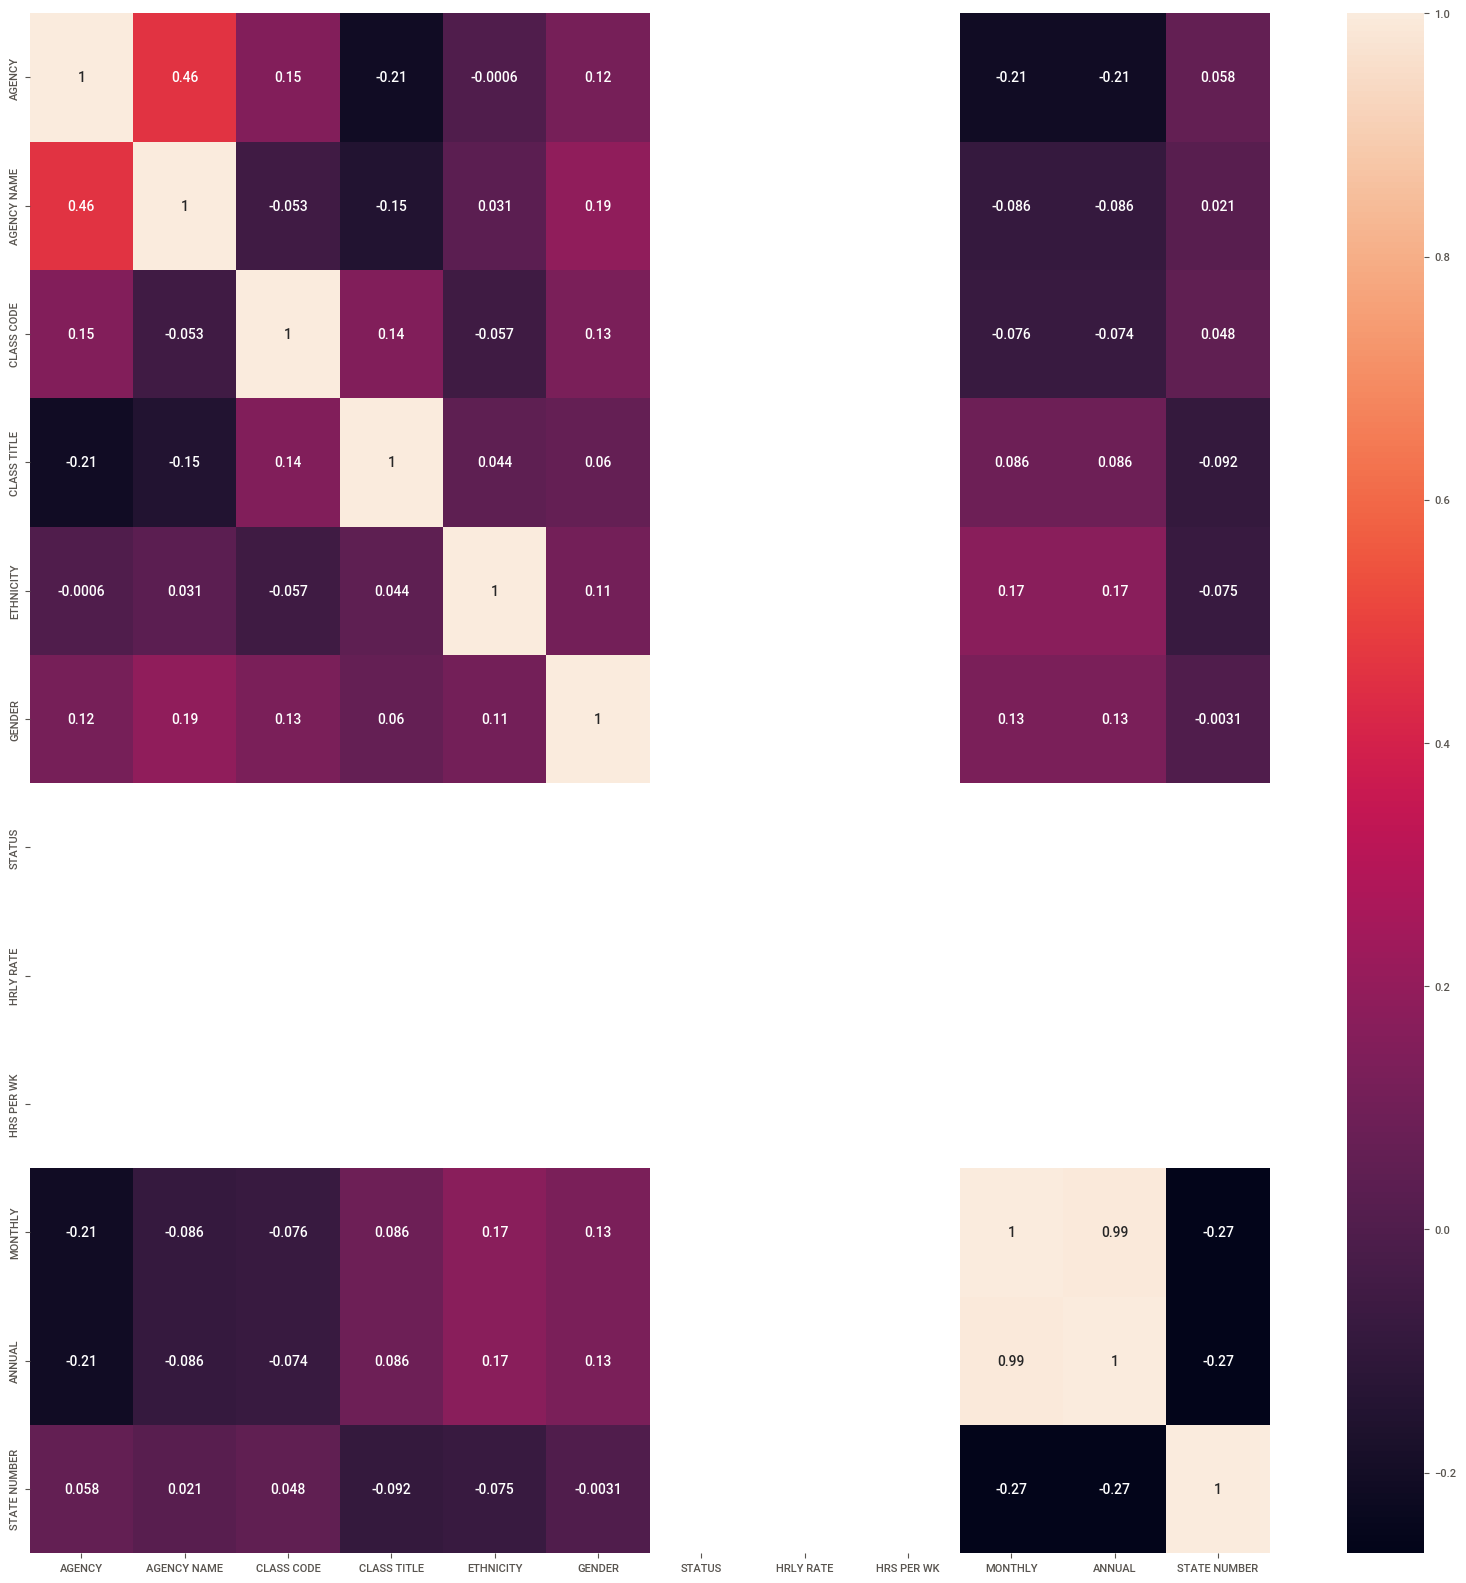

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(scale_data.corr(),annot=True)
plt.show()

In [58]:
scale_data.drop(["STATUS","HRLY RATE","HRS PER WK"],axis=1,inplace=True) # we delete the ["STATUS","HRLY RATE","HRS PER WK"] bcoz of those columns are have NAN correlation

In [59]:
#This function made for finding the high correlation
def correlation(dataset,threhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [97]:
corr_features = correlation(scale_data,0.90) # finsd the high correlation 
corr_features

set()

In [61]:
scale_data.drop(corr_features,inplace=True,axis=1) # remove the high corelation column on the scale_data

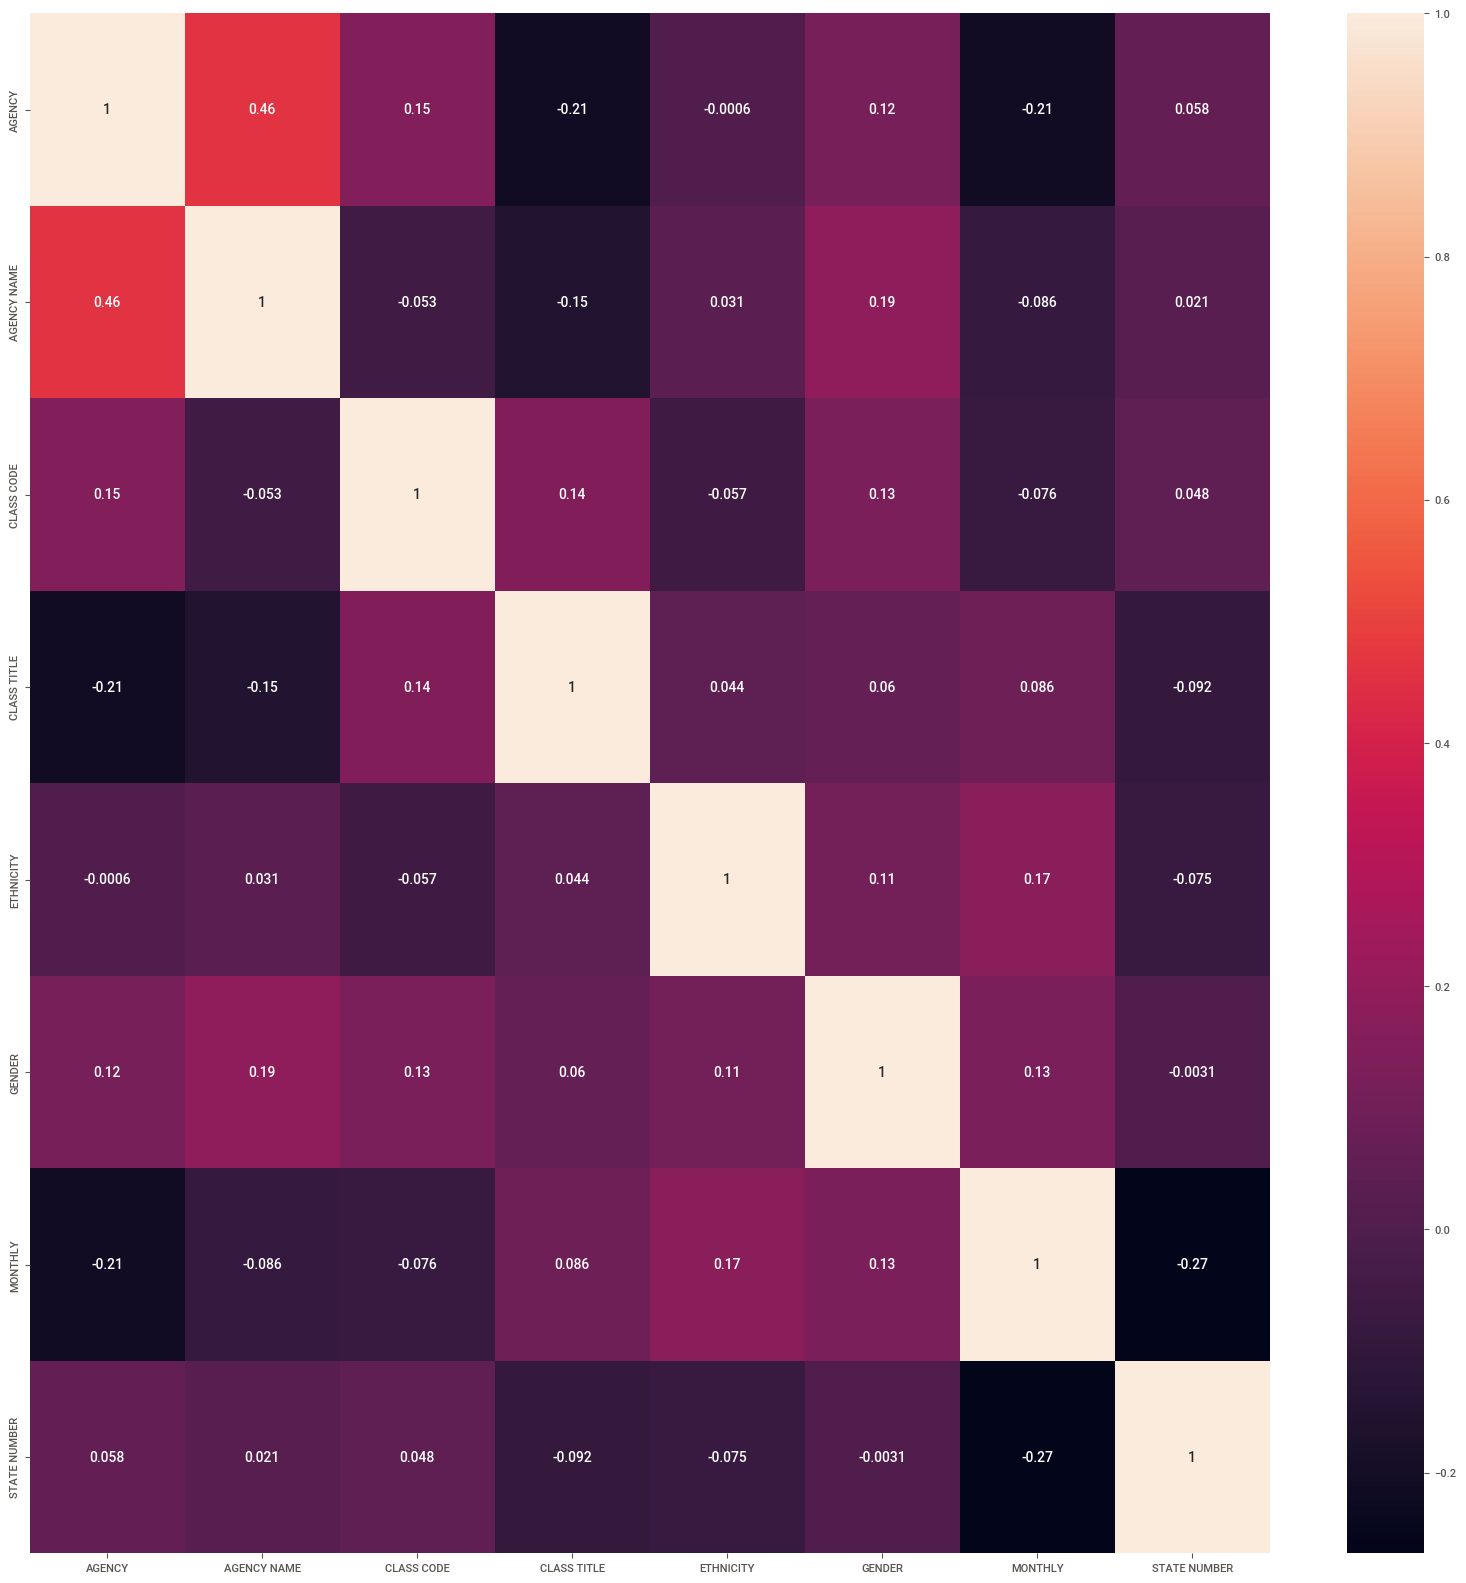

In [62]:
# after delete the high and NAN correlation columns
plt.figure(figsize=(20,20))
sns.heatmap(scale_data.corr(),annot=True)
plt.show()

In [140]:
scale_data.to_csv('scale_data.csv')

In [63]:
# split the scale_data into two part x,y 
x = scale_data.drop(["MONTHLY"],axis=1)
y=scale_data["MONTHLY"]

# Model Creation

In [64]:
# split the x,y data using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [65]:
x_train.shape # shape of train data

(104636, 7)

In [66]:
x_test.shape # shape of test data

(44845, 7)

# LinearRegression

In [92]:
# First model LinerarRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred_lr = lr.predict(x_test) #prediction value of linearregression

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [123]:
r2_score_lr = r2_score(y_test,y_pred_lr)
r2_score_lr

0.1523512747382626

In [71]:
x_test.shape

(44845, 7)

In [72]:
## calculation of adjusted r2 score
adjusted_r2 = 1-((1-0.15252079782039252)*(44845-1)/(44845-7-1))
adjusted_r2

0.1523884884684007

In [73]:
import math
print(mean_squared_error(y_test,y_pred_lr))
print(math.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.8454152567739953
0.9194646577079487


In [74]:
print(mean_absolute_error(y_test,y_pred_lr))

0.6087663237059597


# XBGRegression

In [75]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [76]:
y_pred_xgbr = xgbr.predict(x_test)

In [77]:
r2_score_xgbr = r2_score(y_test,y_pred_xgbr)
r2_score_xgbr

0.9114507579224448

In [78]:
## calculation of adjusted r2 score
xgbr_adjusted_r2 = 1-((1-r2_score_xgbr)*(44845-1)/(44845-7-1))
xgbr_adjusted_r2

0.9114369335208448

In [79]:
print(mean_squared_error(y_test,y_pred_xgbr))
print(math.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

0.08831592379853272
0.2971799518785423


# DecisionTressRegression

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
y_hat=dt.predict(x_test)

In [100]:
r2_score_dt = r2_score(y_test,y_hat)
r2_score_dt

0.8731752263712615

In [127]:
## calculation of adjusted r2 score
dt_adjusted_r2 = 1-((1-r2_score_dt)*(44845-1)/(44845-7-1))
dt_adjusted_r2

0.8731554263530756

# RandomForestRegression

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
y_rf = rf.predict(x_test)

In [101]:
r2_score_rf = r2_score(y_test,y_rf)
r2_score_rf

0.9184499419244156

In [128]:
## calculation of adjusted r2 score
rf_adjusted_r2 = 1-((1-r2_score_rf)*(44845-1)/(44845-7-1))
rf_adjusted_r2

0.9184372102428462

# GradientBoostingRegression

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [88]:
y_gr=gr.predict(x_test)

In [104]:
r2_score_gb = r2_score(y_test,y_gr)
r2_score_gb

0.7059431980437678

In [129]:
## calculation of adjusted r2 score
gb_adjusted_r2 = 1-((1-r2_score_gb)*(44845-1)/(44845-7-1))
gb_adjusted_r2

0.7058972895839313

In [136]:
output={"Model":["LinearRegression","XBGRegression","DecisionTressRegression","RandomForestRegression","GradientBoostingRegression"],
       "R2_Score":[r2_score_lr,r2_score_xgbr,r2_score_dt,r2_score_rf,r2_score_gb],
       "Adjusted_R2_Score":[adjusted_r2,xgbr_adjusted_r2,dt_adjusted_r2,rf_adjusted_r2,gb_adjusted_r2]}

In [137]:
final_output= pd.DataFrame(output)

In [141]:
final_output.to_csv("final_output.csv")

In [138]:
final_output

,Model,R2_Score,Adjusted_R2_Score
0,LinearRegression,0.152351,0.152388
1,XBGRegression,0.911451,0.918437
2,DecisionTressRegression,0.873175,0.873155
3,RandomForestRegression,0.918450,0.918437
4,GradientBoostingRegression,0.705943,0.705897


* From the final_output we find the best model is [ RandomForestRegression ]